# KNN Project Exercise 

Due to the simplicity of KNN for Classification, let's focus on using a PipeLine and a GridSearchCV tool, since these skills can be generalized for any model.


## The Sonar Data 

### Detecting a Rock or a Mine

Sonar (sound navigation ranging) is a technique that uses sound propagation (usually underwater, as in submarine navigation) to navigate, communicate with or detect objects on or under the surface of the water, such as other vessels.

<img src="sonar.jpg"  style="max-height: 500px; max-width: 500px;">

The data set contains the response metrics for 60 separate sonar frequencies sent out against a known mine field (and known rocks). These frequencies are then labeled with the known object they were beaming the sound at (either a rock or a mine). 

<img src="mine.jpg"  style="max-height: 500px; max-width: 500px;">

Our main goal is to create a machine learning model capable of detecting the difference between a rock or a mine based on the response of the 60 separate sonar frequencies.


Data Source: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

### Complete the Tasks in bold

**TASK: Run the cells below to load the data.**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Data/sonar.all-data.csv')

In [4]:
df.sample(10)

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
144,0.0299,0.0688,0.0992,0.1021,0.0800,0.0629,0.0130,0.0813,0.1761,0.0998,...,0.0459,0.0277,0.0172,0.0087,0.0046,0.0203,0.0130,0.0115,0.0015,M
182,0.0095,0.0308,0.0539,0.0411,0.0613,0.1039,0.1016,0.1394,0.2592,0.3745,...,0.0181,0.0019,0.0102,0.0133,0.0040,0.0042,0.0030,0.0031,0.0033,M
193,0.0203,0.0121,0.0380,0.0128,0.0537,0.0874,0.1021,0.0852,0.1136,0.1747,...,0.0134,0.0094,0.0047,0.0045,0.0042,0.0028,0.0036,0.0013,0.0016,M
107,0.0428,0.0555,0.0708,0.0618,0.1215,0.1524,0.1543,0.0391,0.0610,0.0113,...,0.0142,0.0179,0.0079,0.0060,0.0131,0.0089,0.0084,0.0113,0.0049,M
152,0.0131,0.0201,0.0045,0.0217,0.0230,0.0481,0.0742,0.0333,0.1369,0.2079,...,0.0168,0.0086,0.0045,0.0062,0.0065,0.0030,0.0066,0.0029,0.0053,M
156,0.0047,0.0059,0.0080,0.0554,0.0883,0.1278,0.1674,0.1373,0.2922,0.3469,...,0.0095,0.0126,0.0069,0.0039,0.0068,0.0060,0.0045,0.0002,0.0029,M
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
65,0.0176,0.0172,0.0501,0.0285,0.0262,0.0351,0.0362,0.0535,0.0258,0.0474,...,0.0042,0.0175,0.0171,0.0079,0.0050,0.0112,0.0179,0.0294,0.0063,R
27,0.0177,0.0300,0.0288,0.0394,0.0630,0.0526,0.0688,0.0633,0.0624,0.0613,...,0.0102,0.0122,0.0044,0.0075,0.0124,0.0099,0.0057,0.0032,0.0019,R
108,0.0599,0.0474,0.0498,0.0387,0.1026,0.0773,0.0853,0.0447,0.1094,0.0351,...,0.0013,0.0005,0.0227,0.0209,0.0081,0.0117,0.0114,0.0112,0.0100,M


## Data Exploration

**TASK: Create a heatmap of the correlation between the difference frequency responses.**

<Axes: >

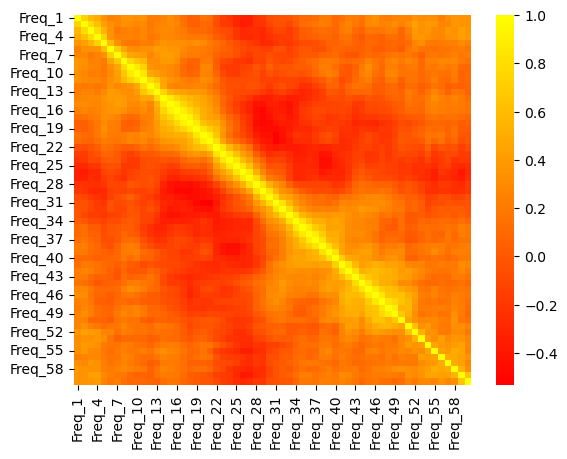

In [5]:
sns.heatmap(df.corr(numeric_only=True), cmap='autumn')

**TASK: What are the top 5 correlated frequencies with the target\label?**

*Note: You many need to map the label to 0s and 1s.*

*Additional Note: We're looking for **absolute** correlation values.*

In [6]:
df['Label'] = df['Label'].replace({'R':0, 'M': 1})
df.sample(10)

C:\Users\piyus\AppData\Local\Temp\ipykernel_22112\1016974111.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Label'] = df['Label'].replace({'R':0, 'M': 1})


,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
21,0.0664,0.0575,0.0842,0.0372,0.0458,0.0771,0.0771,0.1130,0.2353,0.1838,...,0.0141,0.0190,0.0043,0.0036,0.0026,0.0024,0.0162,0.0109,0.0079,0
59,0.0125,0.0152,0.0218,0.0175,0.0362,0.0696,0.0873,0.0616,0.1252,0.1302,...,0.0041,0.0074,0.0030,0.0050,0.0048,0.0017,0.0041,0.0086,0.0058,0
51,0.0131,0.0068,0.0308,0.0311,0.0085,0.0767,0.0771,0.0640,0.0726,0.0901,...,0.0062,0.0028,0.0040,0.0075,0.0039,0.0053,0.0013,0.0052,0.0023,0
197,0.0366,0.0421,0.0504,0.0250,0.0596,0.0252,0.0958,0.0991,0.1419,0.1847,...,0.0132,0.0027,0.0022,0.0059,0.0016,0.0025,0.0017,0.0027,0.0027,1
116,0.0094,0.0333,0.0306,0.0376,0.1296,0.1795,0.1909,0.1692,0.1870,0.1725,...,0.0153,0.0112,0.0241,0.0164,0.0055,0.0078,0.0055,0.0091,0.0067,1
64,0.0071,0.0103,0.0135,0.0494,0.0253,0.0806,0.0701,0.0738,0.0117,0.0898,...,0.0043,0.0048,0.0076,0.0124,0.0105,0.0054,0.0032,0.0073,0.0063,0
131,0.1150,0.1163,0.0866,0.0358,0.0232,0.1267,0.2417,0.2661,0.4346,0.5378,...,0.0099,0.0065,0.0085,0.0166,0.0110,0.0190,0.0141,0.0068,0.0086,1
138,0.0731,0.1249,0.1665,0.1496,0.1443,0.2770,0.2555,0.1712,0.0466,0.1114,...,0.0444,0.0230,0.0290,0.0141,0.0161,0.0177,0.0194,0.0207,0.0057,1
156,0.0047,0.0059,0.0080,0.0554,0.0883,0.1278,0.1674,0.1373,0.2922,0.3469,...,0.0095,0.0126,0.0069,0.0039,0.0068,0.0060,0.0045,0.0002,0.0029,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0


In [7]:
df.corr()['Label'].nlargest(6).sort_values(ascending=True)

Freq_45    0.339406
Freq_10    0.341142
Freq_49    0.351312
Freq_12    0.392245
Freq_11    0.432855
Label      1.000000
Name: Label, dtype: float64

## Train | Test Split

Our approach here will be one of using Cross Validation on 90% of the dataset, and then judging our results on a final test set of 10% to evaluate our model.

**TASK: Split the data into features and labels, and then split into a training set and test set, with 90% for Cross-Validation training, and 10% for a final test set.**

*Note: The solution uses a random_state=42*

In [8]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]
y = df.iloc[:,-1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(187, 60)
(21, 60)
(187, 1)
(21, 1)


**TASK: Create a PipeLine that contains both a StandardScaler and a KNN model**

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
scaler = StandardScaler()
knn = KNeighborsClassifier(n_jobs=-1)

pipe_operations = [('scaler', scaler),('knn', knn)]
pipe = Pipeline(steps=pipe_operations)
display(pipe)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_jobs=-1))])

In [11]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': -1,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

**TASK: Perform a grid-search with the pipeline to test various values of k and report back the best performing parameters.**

In [12]:
from sklearn.model_selection import GridSearchCV

k_vals = np.array(range(1,30))
k_vals
param_grid = {'knn__n_neighbors': k_vals}
grid = GridSearchCV(pipe, param_grid,scoring='accuracy', cv=5, verbose=4, n_jobs=-1)

In [13]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


c:\Users\piyus\anaconda3\envs\datascience\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             scoring='accuracy', verbose=4)

In [14]:
grid.best_params_

{'knn__n_neighbors': 1}

**(HARD) TASK: Using the .cv_results_ dictionary, see if you can create a plot of the mean test scores per K value.**

In [18]:
import plotly.express as px
fig = px.line(x=k_vals, y=grid.cv_results_['mean_test_score'], 
              title='Mean Test Score for each K',
              range_x=[0,31],
              markers=True,
              labels={"y": 'Error',"x": "K value"}
            )
fig.show()

### Final Model Evaluation

**TASK: Using the grid classifier object from the previous step, get a final performance classification report and confusion matrix.**

In [16]:
y_pred = grid.predict(X_test)

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.92      0.92      0.92        13

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21

